# Example of a GP in a noiseless process using a square exponential kernel

This code is a modification of the example found in scikit Learn by  Dubourg, Vanderplas, Metzen and Lemaitre.

The first cell constructs signal $y=x \sin(x)$ +b in the interval $0 \leq x \leq 10$, where initially the bias is set to zero.

In [ ]:
import numpy as np

b=0
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))+b

This is the plot of the signal. Next, a set of only 6 points are extracted to use them as training data.  

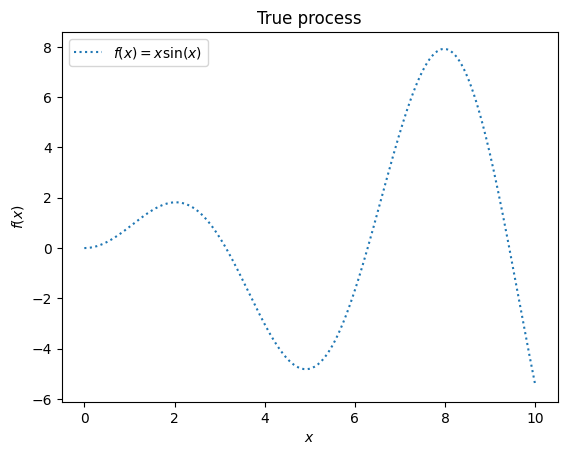

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("True process")
plt.show()

In [ ]:
rng = np.random.RandomState(20) # Change the random state value in order to obtain a different training dataset
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
#training_indices = np.random.choice(np.arange(y.size), size = 6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

The traiing data is shown below together with the whole process.

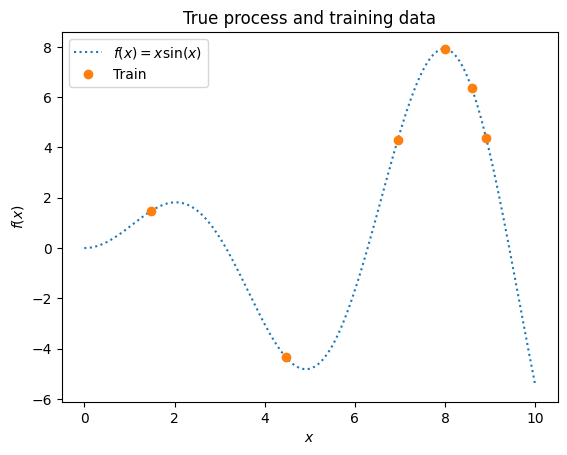

In [ ]:

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.plot(X_train, y_train,'o', label="Train", )
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("True process and training data")
plt.show()

The next cell imports the GP library and the square exponential kernel (named RBF). The kernel is constructed so tghe initial value for the amplitude is $2$, and the lengthscale is bounded between $10^{-2}$ and $100$. The lengthscale in this kernel is defined as $\gamma = \frac{1}{2\sigma^2}$. A bias equal to 1 is also added to teh kernel.

The optimization of the GP with the training data shows the final parameters. The lengthscale result is around 1 and the amplitude around $5^2$ for the data generated with a seed (random state) equal to $20$. The optimization of the bias results in a very small value $\approx 10^{-5}$, since the mean of the regressors is zero. If parameter $b$ in the first cell is changed to a nonzero value, the bias of the kernel will be optimized accordingly.

For example, compare the optimized parameters if b=-1000 when the kernel has an initial bias equal to 1 and when the bias is removed from the kernel.



In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

kernel = 2 * RBF(length_scale=2.0, length_scale_bounds=(1e-2, 1e2)) +  WhiteKernel(0.1)#length_scale is \gamma
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


4.37**2 * RBF(length_scale=1.22) + WhiteKernel(noise_level=1e-05)

In te following cell, the previous process, generated in cell [2] is used as a test set. The confidence interval, defined here as 95% confidence interval or $1.96\sigma$, is also represented. Notice that the interval is wider in these areas where there are no training data close to the test data.  

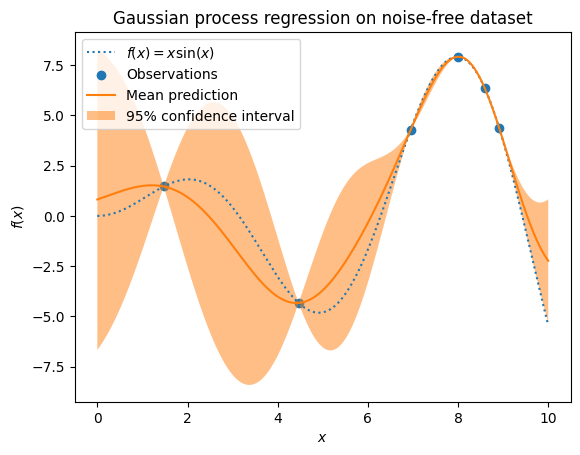

In [ ]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")
plt.show()

Now we repeat the experiment, but with a noisy signal

In [ ]:
noise_std = 1
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gaussian_process.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


The plot below shows the confidence intervals. The blue bars show the uncertainty given the noise of the process.

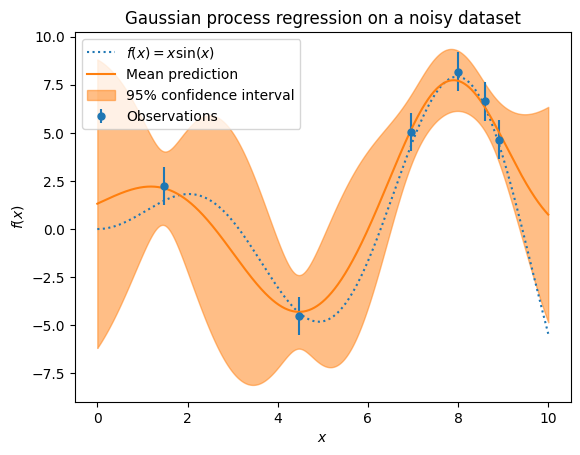

In [ ]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")